In [144]:
import pandas as pd
import numpy as np
import time

In [145]:
%%bash
ls

links.csv
 Movielens.ipynb
movies.csv
ratings.csv
README.txt
tags.csv
Test Plotly.ipynb


In [146]:
t=time.time()
raw_movies=pd.read_csv('movies.csv')
raw_ratings=pd.read_csv('ratings.csv')

In [147]:
raw_movies.describe(include='all')

,movieId,title,genres
count,9125.000000,9125,9125
unique,NaN,9123,902
top,NaN,War of the Worlds (2005),Drama
freq,NaN,2,1170
mean,31123.291836,NaN,NaN
std,40782.633604,NaN,NaN
min,1.000000,NaN,NaN
25%,2850.000000,NaN,NaN
50%,6290.000000,NaN,NaN
75%,56274.000000,NaN,NaN


In [148]:
raw_movies.head(25)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [149]:
###One hot encoding 
###Can be upgraded
genres=['Action','Adventure','Animation', 'Children','Comedy', 'Crime', 'Documentary',
        'Drama', 'Fantasy', 'Film-Noir','Horror',
        'Musical','Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)','IMAX']
dic_gen={}
contador=0
for i in genres:
    dic_gen[i]=contador
    contador+=1
data_mov_str=[]
for i in range(len(raw_movies)):
    data_mov_str.append([raw_movies.movieId[i],np.array(raw_movies.genres[i].split('|'))])
data_mov_str[0]

[1, array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'], 
       dtype='|S9')]

In [150]:
def OHE(mov,gen,dic):
    x=np.zeros(len(gen))
    for i in mov:
        x[dic[i]]=1.
    return x

In [151]:
data_OHE=[]
for i in data_mov_str:
    data_OHE.append([i[0],OHE(i[1],genres,dic_gen)])

In [152]:
data_OHE[0]

[1, array([ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.])]

In [153]:
def transform(user_id_dataset,data_ohe):
    data=[]
    for i in range(1,671+1):   ###generalize to arbritrary length
        user=user_id_dataset[user_id_dataset.userId==i]
        final_point=np.zeros(len(dic_gen))
        for j in range(len(user)):
            point=get_point(user.movieId[user.index[j]],user.rating[user.index[j]],data_ohe)
            final_point+=point
        data.append(final_point/len(user))
    return data

def get_point(mov_Id,user_rat,data_ohe): ####This function can be modified and will improve (or not) the results
    for i in data_ohe:
        if mov_Id==i[0]:
            return (2*(user_rat-0.5)/4.5-1)*i[1] ###Here

In [154]:
tt=time.time()
data=transform(raw_ratings,data_OHE)
data=np.array(data)
tt-time.time()

-37.72451615333557

In [155]:
data_DF=pd.DataFrame(data)

In [156]:
data_DF.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,0.109121,0.096540,0.028750,0.033323,0.130365,0.082828,0.004959,0.204444,0.042529,0.005297,0.018376,0.018319,0.035021,0.079255,0.063872,0.108677,0.028580,0.007718,0.000046,0.016737
std,0.105392,0.092389,0.044733,0.048500,0.100938,0.066083,0.013478,0.124671,0.048265,0.016701,0.038541,0.028769,0.035723,0.068031,0.077015,0.085209,0.030230,0.012836,0.000474,0.031152
min,-0.185185,-0.248677,-0.142857,-0.211640,-0.410431,-0.054307,-0.048413,-0.273810,-0.138889,-0.047619,-0.272222,-0.086957,-0.061728,-0.151515,-0.117284,-0.216931,-0.050000,-0.043478,-0.002196,-0.067901
25%,0.038945,0.038820,0.002039,0.004103,0.070909,0.038194,0.000000,0.125933,0.012289,0.000000,0.000000,0.000000,0.012486,0.038812,0.017189,0.050615,0.010052,0.000000,0.000000,0.000000
50%,0.086151,0.082126,0.018215,0.023449,0.124356,0.074074,0.000000,0.194771,0.035088,0.000000,0.012346,0.010417,0.027778,0.071563,0.045584,0.098039,0.023269,0.003451,0.000000,0.004831
75%,0.161593,0.145521,0.040764,0.051498,0.180939,0.114478,0.004946,0.274118,0.064086,0.004568,0.027778,0.026455,0.050163,0.110871,0.091642,0.154015,0.042363,0.013072,0.000000,0.020419
max,0.700000,0.633333,0.408333,0.276190,0.494523,0.510288,0.153846,0.578014,0.315556,0.240240,0.430556,0.168277,0.273902,0.565657,0.570988,0.420420,0.331089,0.095238,0.006211,0.245169


In [157]:
data_normal=(data_DF-data_DF.mean())/data_DF.std()

In [158]:
data_normal.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02
mean,1.846511e-16,-1.632077e-15,-3.812152e-16,-1.665169e-15,-2.250228e-16,-8.947967e-16,-3.706259e-17,-1.802830e-15,-2.514961e-17,2.779694e-16,-8.603815e-17,-3.441526e-16,-6.035907e-16,-5.453495e-16,-6.234457e-16,-1.466620e-15,-1.135704e-15,8.590578e-16,3.441526e-17,-3.110610e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.792494e+00,-3.736543e+00,-3.836281e+00,-5.050824e+00,-5.357684e+00,-2.075189e+00,-3.959933e+00,-3.836118e+00,-3.758773e+00,-3.168415e+00,-7.540003e+00,-3.659323e+00,-2.708289e+00,-3.392126e+00,-2.352218e+00,-3.821283e+00,-2.599413e+00,-3.988608e+00,-4.732319e+00,-2.716928e+00
25%,-6.658584e-01,-6.247438e-01,-5.971343e-01,-6.024948e-01,-5.890334e-01,-6.754105e-01,-3.679400e-01,-6.297396e-01,-6.265347e-01,-3.171899e-01,-4.767961e-01,-6.367522e-01,-6.308221e-01,-5.944715e-01,-6.061521e-01,-6.814103e-01,-6.128990e-01,-6.012798e-01,-9.668180e-02,-5.372697e-01
50%,-2.179483e-01,-1.560183e-01,-2.355197e-01,-2.036025e-01,-5.953168e-02,-1.324626e-01,-3.679400e-01,-7.758280e-02,-1.541654e-01,-3.171899e-01,-1.564692e-01,-2.746734e-01,-2.027618e-01,-1.130646e-01,-2.374560e-01,-1.248462e-01,-1.756825e-01,-3.324442e-01,-9.668180e-02,-3.821952e-01
75%,4.978757e-01,5.301574e-01,2.685582e-01,3.747263e-01,5.010367e-01,4.789508e-01,-9.908305e-04,5.588626e-01,4.466431e-01,-4.368849e-02,2.439393e-01,2.828129e-01,4.238728e-01,4.647227e-01,3.605881e-01,5.320792e-01,4.559257e-01,4.171327e-01,-9.668180e-02,1.181922e-01
max,5.606484e+00,5.810113e+00,8.485564e+00,5.007594e+00,3.607720e+00,6.468538e+00,1.104672e+01,2.996449e+00,5.656826e+00,1.406737e+01,1.069460e+01,5.212481e+00,6.686936e+00,7.149692e+00,6.584655e+00,3.658563e+00,1.000690e+01,6.818582e+00,1.301555e+01,7.332762e+00


671.0
[ 671.]
330.0
[ 330.  341.]
130.0
[ 130.  305.  236.]
90.0
[ 104.  192.   90.  285.]
6.0
[ 193.    6.  279.  104.   89.]
8.0
[ 103.  109.  109.  287.    8.   55.]
5.0
[   5.   83.  240.   78.  103.  122.   40.]


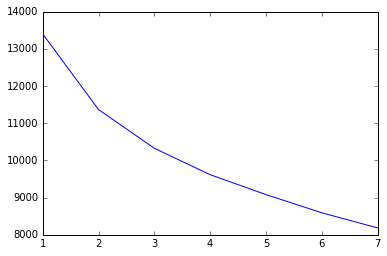

In [159]:
from sklearn.cluster import KMeans as KM
inertia=[]
maxi=8
for i in range(1,maxi):
    km=KM(n_clusters=i)
    km.fit(np.array(data_normal))
    inertia.append(km.inertia_)
    labels=km.labels_
    counter=np.zeros(i)
    for i in labels:
        counter[i]+=1
    print counter.min()
    print counter
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(1,maxi),inertia)
plt.show()
###3 or 4 clusters seems right, there is no general rule

array([   5.,   83.,  240.,   78.,  103.,  122.,   40.])

In [199]:
C=4
km=KM(n_clusters=C)
km.fit(np.array(data_normal))
labels=km.labels_

In [200]:
lab=np.zeros(len(raw_ratings))
for i in raw_ratings.index:
    lab[i]=labels[raw_ratings.userId[i]-1]
len(lab)

100004

In [201]:
lista1=list(np.array(raw_ratings.drop('timestamp',axis=1)))
data_final=[]
for i in range(len(lab)):
    lista2=list(lista1[i])
    lista2.append(lab[i])
    lista2=np.array(lista2)
    data_final.append(lista2)
data_final=np.array(data_final)
data_final

array([[  1.00000000e+00,   3.10000000e+01,   2.50000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   1.02900000e+03,   3.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   1.06100000e+03,   3.00000000e+00,
          1.00000000e+00],
       ..., 
       [  6.71000000e+02,   6.36500000e+03,   4.00000000e+00,
          2.00000000e+00],
       [  6.71000000e+02,   6.38500000e+03,   2.50000000e+00,
          2.00000000e+00],
       [  6.71000000e+02,   6.56500000e+03,   3.50000000e+00,
          2.00000000e+00]])

In [202]:
columnas=list(raw_ratings.drop('timestamp',axis=1).columns)
columnas.append('labels')
columnas
data_with_labels=pd.DataFrame(data_final,columns=columnas)

In [203]:
data_with_labels[data_with_labels['labels']==3].describe()

,userId,movieId,rating,labels
count,7443.000000,7443.000000,7443.000000,7443
mean,339.657934,25570.279054,4.065565,3
std,202.972446,37652.892609,0.836387,0
min,11.000000,1.000000,0.500000,3
25%,169.000000,1262.000000,3.500000,3
50%,291.000000,3897.000000,4.000000,3
75%,546.000000,49275.000000,5.000000,3
max,664.000000,161944.000000,5.000000,3


In [204]:
movies=np.array(raw_movies.movieId)
movies_dic=[]
movies_count_list=[]
for j in range(C):
    movies_scores={}
    movies_count={}
    for i in movies:
        movies_count[i]=0###count
        movies_scores[i]=0###score
    mask=data_with_labels['labels']==j
    data_mask=data_with_labels[mask]
    for i in data_mask.index:
        movies_count[data_mask.movieId[i]]+=1
        movies_scores[data_mask.movieId[i]]+=data_mask.rating[i]
    for i in movies_scores:
        if movies_scores[i]!=0:
            movies_scores[i]=movies_scores[i]/movies_count[i]
    movies_dic.append(movies_scores)
    movies_count_list.append(movies_count)

In [205]:
counter=np.zeros(C)
for i in labels:
    counter[i]+=1
counter


array([ 283.,  195.,  109.,   84.])

In [218]:
pop_mov=[]
for j in range(C):
    mov_clus=[]
    contador=0
    print 'cluster' , j
    for i in movies:
        if 0.4*counter[j]<movies_count_list[j][i]<0.5*counter[j]:
            mov_clus.append(i)
            print i,movies_count_list[j][i],movies_dic[j][i]
            contador+=1
    mov_clus=np.array(mov_clus)
    pop_mov.append(mov_clus)
    print contador,'\n'
pop_mov=np.array(pop_mov)

cluster 0
527 124 4.33870967742
608 116 4.43965517241
2858 121 4.39256198347
3 

cluster 1
260 82 3.91463414634
296 95 3.88947368421
318 90 4.12777777778
356 97 3.63402061856
480 90 3.31666666667
593 89 3.98876404494
6 

cluster 2
1 54 4.42592592593
260 44 4.43181818182
364 54 4.30555555556
480 50 4.1
595 54 4.37962962963
5 

cluster 3
296 36 4.44444444444
589 39 4.46153846154
1198 35 4.6
1210 40 4.575
1270 36 4.375
4993 40 4.4875
5952 37 4.47297297297
79132 39 4.5
8 



In [219]:
for i in range(C):
    print 'cluster',i ,'\n'
    for j in pop_mov[i]:
        print raw_movies[raw_movies.movieId==j].title 
    print '\n'

cluster 0 

472    Schindler's List (1993)
Name: title, dtype: object
535    Fargo (1996)
Name: title, dtype: object
2288    American Beauty (1999)
Name: title, dtype: object


cluster 1 

232    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object
266    Pulp Fiction (1994)
Name: title, dtype: object
284    Shawshank Redemption, The (1994)
Name: title, dtype: object
321    Forrest Gump (1994)
Name: title, dtype: object
427    Jurassic Park (1993)
Name: title, dtype: object
525    Silence of the Lambs, The (1991)
Name: title, dtype: object


cluster 2 

0    Toy Story (1995)
Name: title, dtype: object
232    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object
328    Lion King, The (1994)
Name: title, dtype: object
427    Jurassic Park (1993)
Name: title, dtype: object
527    Beauty and the Beast (1991)
Name: title, dtype: object


cluster 3 

266    Pulp Fiction (1994)
Name: title, dtype: object
522    Terminator 2: Judgment Day (1991)
Name: title, dtyp

In [213]:
raw_movies[raw_movies.movieId==1197]

,movieId,title,genres
954,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance


In [208]:
print t-time.time()

-457.368138075
